# Software Development for AI - Project 1

## Anomaly Detection using Unsupervised learning in Sales Data

By: Ashwini Kumar Sharma
ashwinisharma@my.unt.edu


### Project Details and Flow

Dataset used:
Sample - Superstore.xls

https://community.tableau.com/s/question/0D54T00000CWeX8SAL/sample-superstore-sales-excelxls


Data Analysis & Pre-processing:
*   Adding Cost and ItemCost
*   Converting Category and Sub-Category string data to numerical data

Understanding relation between different features
*   Sales - Profit
*   Cost - Profit
*   Discount - Profit
*   Category - Profit
*   Sub-Category - Profit
*   Sales - Cost - Profit

Anomaly Detection Approach:
*   Univariate
*   Multivariate

Algorithms & Techniques Used:
*   MinMaxScaler
*   k-NN
*   Isolation Forest

Plotting:
Plotted all realtionships using Seaborn and matplotlib
Represented detected anomalies in Map for each of the US states

Analysis:
Explanation of findings from the dataset
New columns were appended in single dataset
Final dataset has original columns and all 6 type of outliers
Few samples explored where all techniques resulted as outlier

All references re mentioned at the end

### Code:

Installing pyod

In [ ]:
#!pip install pyod

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 KB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.0.7-py3-none-any.whl size=181101 sha256=a57354a147b9da4640d621285dc8a56a79337a7eb4467e9164ad00f7ad29a7b4
  Stored in directory: /root/.cache/pip/wheels/f7/e2/c1/1c7fd8b261e72411f6509afb429c84532e40ddcd96074473f4
Successfully built pyod


Importing modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from pyod.models.knn import KNN

from sklearn.preprocessing import MinMaxScaler

import seaborn as sns

from sklearn.ensemble import IsolationForest

from google.colab import drive

Importing dataset from google drive

In [ ]:
drive.mount('/content/drive')

%cd /content/drive/My Drive/Colab Notebooks/datasets

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/datasets


In [ ]:
df_superstore = pd.read_excel("Sample - Superstore.xls")

df_states = pd.read_csv('name-abbr.csv',names=["State", "State_Code"])

In [ ]:
df_superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df_superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

Adding New Features

In [ ]:
df_superstore['Cost'] = (df_superstore['Sales']-df_superstore['Profit'])

In [ ]:
df_superstore['ItemCost'] = (df_superstore['Cost']/df_superstore['Quantity'])

In [ ]:
df_superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

Understanding value for each important feature

In [ ]:
df_superstore.Sales.describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

In [ ]:
df_superstore.Cost.describe()

count     9994.000000
mean       201.201105
std        550.839414
min          0.554400
25%         12.688200
50%         41.664000
75%        182.226300
max      24449.558400
Name: Cost, dtype: float64

In [ ]:
df_superstore.Profit.describe()

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

Plotting relation between features using seaborn

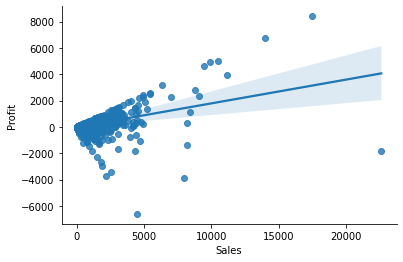

In [ ]:
sns.regplot(x="Sales", y="Profit", data=df_superstore)
sns.despine();

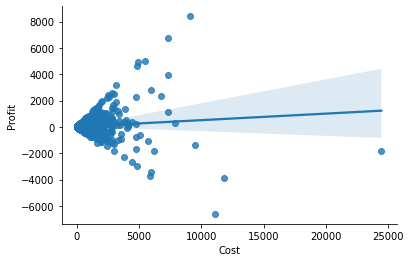

In [ ]:
sns.regplot(x="Cost", y="Profit", data=df_superstore)
sns.despine();

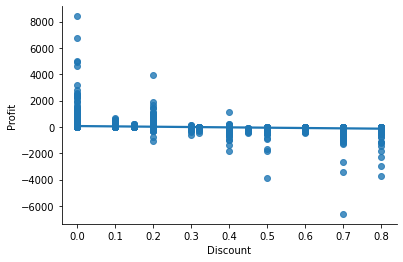

In [ ]:
sns.regplot(x="Discount", y="Profit", data=df_superstore)
sns.despine();

Converting string data to numerical data

In [ ]:
df_superstore.Category.describe()

count                9994
unique                  3
top       Office Supplies
freq                 6026
Name: Category, dtype: object

In [ ]:
print(f"Unique value of category :: {df_superstore.Category.unique()} \n")
print(f"Unique value of sub-category :: {df_superstore['Sub-Category'].unique()} \n")

Unique value of category :: ['Furniture' 'Office Supplies' 'Technology'] 

Unique value of sub-category :: ['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers'] 



In [ ]:
list_col = ["Category","Sub-Category"]

for col in list_col:
    temp_list = list(df_superstore[col].unique())
    temp_list.sort(reverse=list_col.index(col))
    temp_dict = dict(zip(temp_list,range(len(temp_list))))
    df_superstore[col+str("_eda")] = df_superstore[col].map(temp_dict)
    print(temp_dict)

{'Furniture': 0, 'Office Supplies': 1, 'Technology': 2}
{'Tables': 0, 'Supplies': 1, 'Storage': 2, 'Phones': 3, 'Paper': 4, 'Machines': 5, 'Labels': 6, 'Furnishings': 7, 'Fasteners': 8, 'Envelopes': 9, 'Copiers': 10, 'Chairs': 11, 'Bookcases': 12, 'Binders': 13, 'Art': 14, 'Appliances': 15, 'Accessories': 16}


In [ ]:
df_superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Row ID            9994 non-null   int64         
 1   Order ID          9994 non-null   object        
 2   Order Date        9994 non-null   datetime64[ns]
 3   Ship Date         9994 non-null   datetime64[ns]
 4   Ship Mode         9994 non-null   object        
 5   Customer ID       9994 non-null   object        
 6   Customer Name     9994 non-null   object        
 7   Segment           9994 non-null   object        
 8   Country           9994 non-null   object        
 9   City              9994 non-null   object        
 10  State             9994 non-null   object        
 11  Postal Code       9994 non-null   int64         
 12  Region            9994 non-null   object        
 13  Product ID        9994 non-null   object        
 14  Category          9994 n

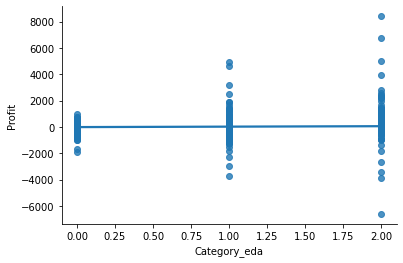

In [ ]:
sns.regplot(x="Category_eda", y="Profit", data=df_superstore)
sns.despine();

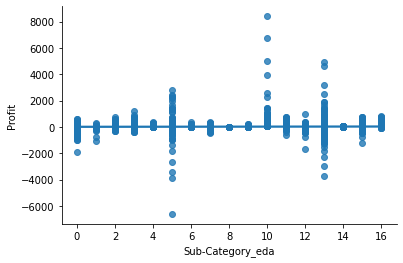

In [ ]:
sns.regplot(x="Sub-Category_eda", y="Profit", data=df_superstore)
sns.despine();

In [ ]:
df_original = df_superstore.copy()

MinMaxScaler

In [ ]:
minmax = MinMaxScaler(feature_range=(0, 1))
df_superstore[['Sales_mm','Profit_mm','Cost_mm','Discount_mm','Category_eda_mm','Sub-Category_eda_mm']] = minmax.fit_transform(df_superstore[['Sales','Profit','Cost','Discount','Category_eda','Sub-Category_eda']])
df_superstore[['Sales_mm','Profit_mm','Cost_mm','Discount_mm','Category_eda_mm','Sub-Category_eda_mm']].head()

,Sales_mm,Profit_mm,Cost_mm,Discount_mm,Category_eda_mm,Sub-Category_eda_mm
0,0.011552,0.442794,0.008978,0.0000,0.0,0.7500
1,0.032313,0.454639,0.020934,0.0000,0.0,0.6875
2,0.000626,0.440458,0.000294,0.0000,0.5,0.3750
3,0.042280,0.414464,0.054810,0.5625,0.0,0.0000
4,0.000968,0.440168,0.000789,0.2500,0.5,0.1250


In [ ]:
#Features to be used in Model
P1 = df_superstore['Sales_mm'].values.reshape(-1,1)
P2 = df_superstore['Profit_mm'].values.reshape(-1,1)
P3 = df_superstore['Cost_mm'].values.reshape(-1,1)
P4 = df_superstore['Discount_mm'].values.reshape(-1,1)
P5 = df_superstore['Category_eda_mm'].values.reshape(-1,1)
P6 = df_superstore['Sub-Category_eda_mm'].values.reshape(-1,1)

X = {}
#Sales vs Profit
X1 = np.concatenate((P1,P2),axis=1)

#Cost vs Profit
X2 = np.concatenate((P3,P2),axis=1)

#Discount vs Profit
X3 = np.concatenate((P4,P2),axis=1)

#Category vs Profit
X4 = np.concatenate((P5,P2),axis=1)

#Sub-Category vs Profit
X5 = np.concatenate((P6,P2),axis=1)

#Sales vs Discount vs Profit
X6 = np.concatenate((P1,P4,P2),axis=1)

X[1]=X1
X[2]=X2
X[3]=X3
X[4]=X4
X[5]=X5
X[6]=X6

value_x = {}
value_x[1]=['Sales', 'Profit']
value_x[2]=['Cost', 'Profit']
value_x[3]=['Discount', 'Profit']
value_x[4]=['Category', 'Profit']
value_x[5]=['Sub-Category', 'Profit']
value_x[6]=['Sales', 'Discount', 'Profit']

### k-NN Model


For feature combination: ['Sales', 'Profit']
OUTLIERS:  91 INLIERS:  9903


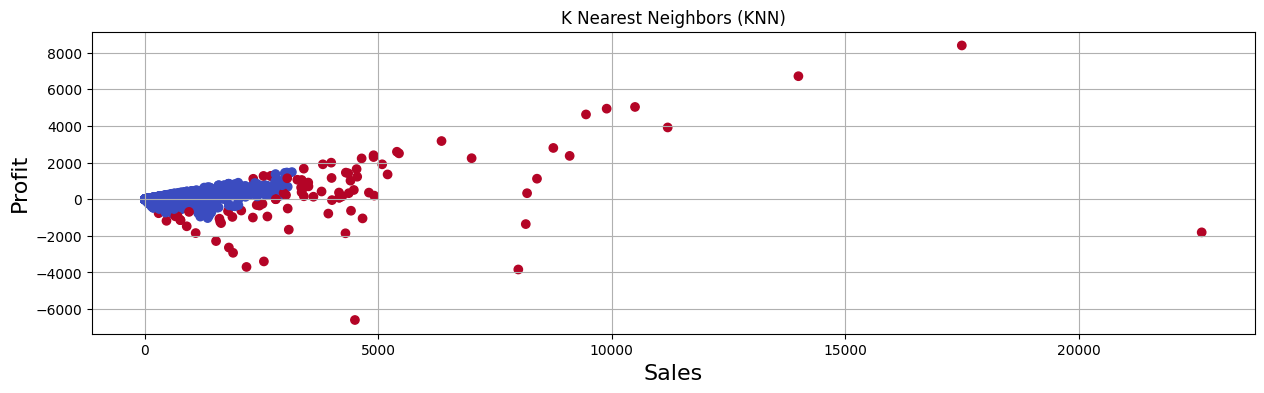


For feature combination: ['Cost', 'Profit']
OUTLIERS:  91 INLIERS:  9903


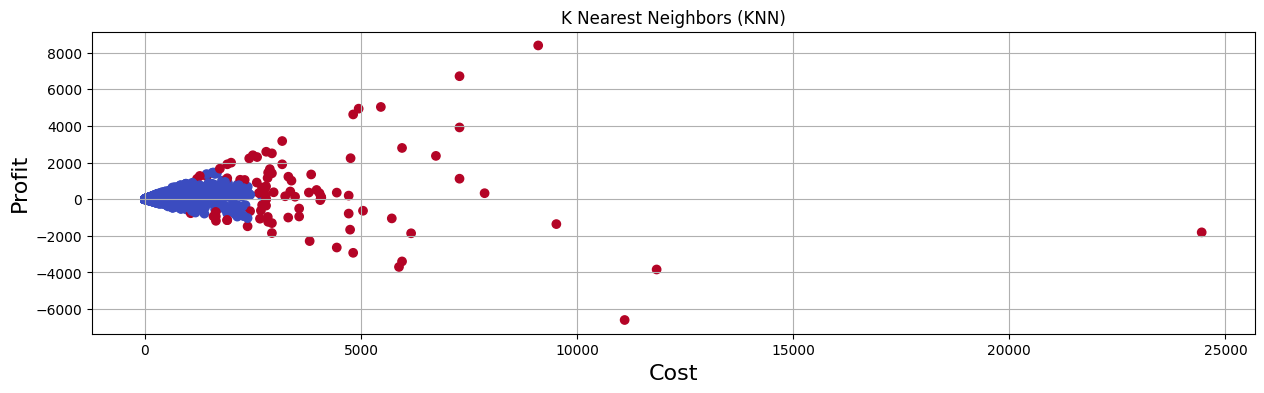


For feature combination: ['Discount', 'Profit']
OUTLIERS:  79 INLIERS:  9915


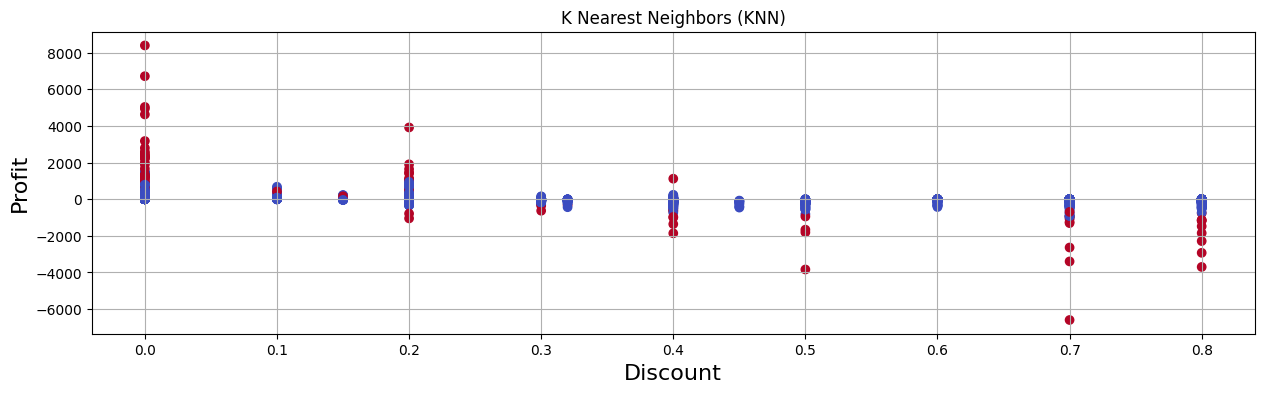


For feature combination: ['Category', 'Profit']
OUTLIERS:  85 INLIERS:  9909


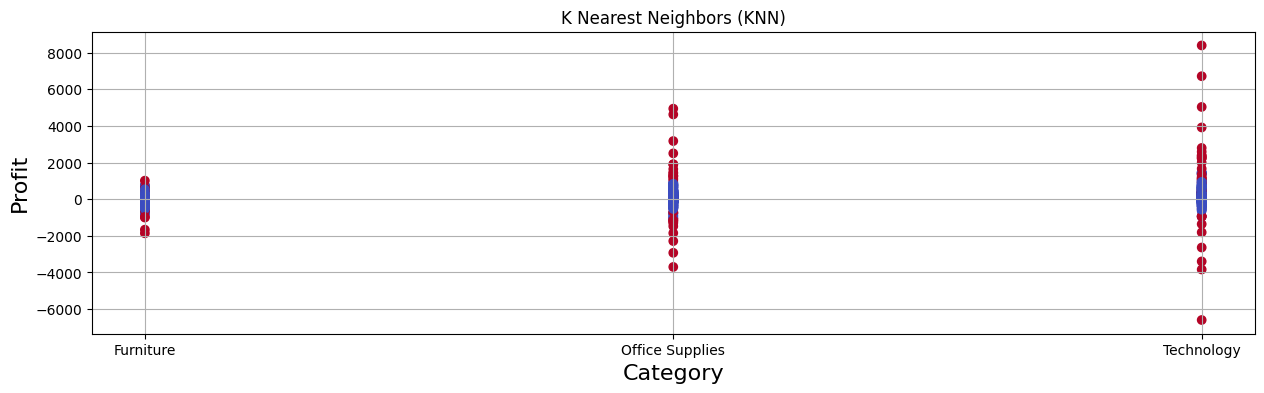


For feature combination: ['Sub-Category', 'Profit']
OUTLIERS:  85 INLIERS:  9909


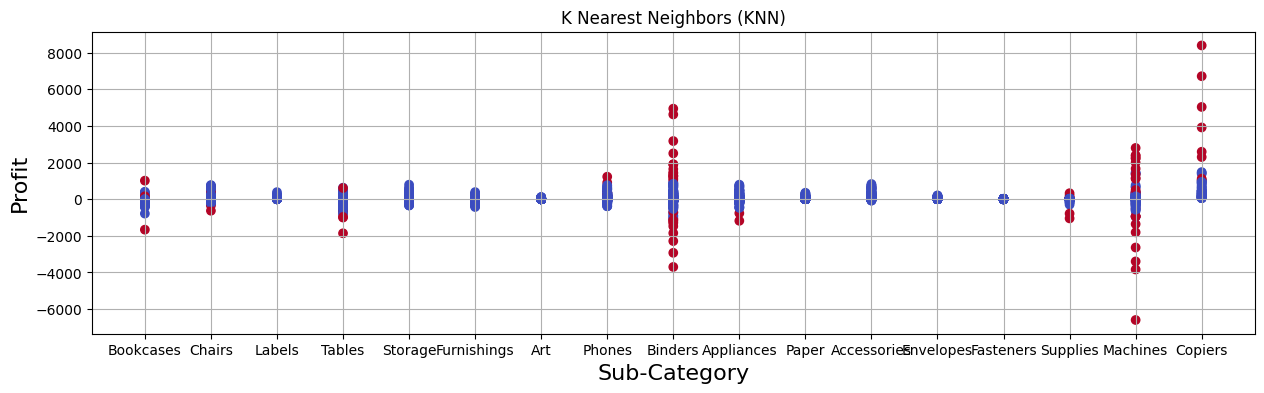


For feature combination: ['Sales', 'Discount', 'Profit']
OUTLIERS:  88 INLIERS:  9906


In [ ]:
outliers_fraction = 0.01

clf = KNN(contamination=outliers_fraction) #, n_neighbors=5)

for i in range (1,7):
  clf.fit(X[i])
  # predict raw anomaly score
  scores_pred = clf.decision_function(X[i]) * -1

  # prediction of a datapoint category outlier or inlier
  y_pred = clf.predict(X[i])
  n_inliers = len(y_pred) - np.count_nonzero(y_pred)
  n_outliers = np.count_nonzero(y_pred == 1)

  #adding to df
  df_superstore['outlier_'+str(i)] = y_pred.tolist()

  print('\nFor feature combination: '+ str(value_x[i]))
  print('OUTLIERS: ',n_outliers,'INLIERS: ',n_inliers)

  if i == 6:
    break

  plt.figure(figsize = (15, 4), dpi = 100)
  s = plt.scatter(df_superstore[value_x[i][0]], df_superstore[value_x[i][1]], c = df_superstore['outlier_1'], cmap = 'coolwarm')
  plt.xlabel(value_x[i][0], fontsize = 16)
  plt.ylabel(value_x[i][1], fontsize = 16)
  plt.title('K Nearest Neighbors (KNN)')
  plt.grid()
  plt.show()




In [ ]:
df_superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Row ID               9994 non-null   int64         
 1   Order ID             9994 non-null   object        
 2   Order Date           9994 non-null   datetime64[ns]
 3   Ship Date            9994 non-null   datetime64[ns]
 4   Ship Mode            9994 non-null   object        
 5   Customer ID          9994 non-null   object        
 6   Customer Name        9994 non-null   object        
 7   Segment              9994 non-null   object        
 8   Country              9994 non-null   object        
 9   City                 9994 non-null   object        
 10  State                9994 non-null   object        
 11  Postal Code          9994 non-null   int64         
 12  Region               9994 non-null   object        
 13  Product ID           9994 non-nul

In [ ]:
print(len(df_superstore.loc[df_superstore['outlier_1']==1]))
print(len(df_superstore.loc[df_superstore['outlier_2']==1]))
print(len(df_superstore.loc[df_superstore['outlier_3']==1]))
print(len(df_superstore.loc[df_superstore['outlier_4']==1]))
print(len(df_superstore.loc[df_superstore['outlier_5']==1]))
print(len(df_superstore.loc[df_superstore['outlier_6']==1]))

91
91
79
85
85
88


Common Ouliers

In [ ]:
len(df_superstore.loc[(df_superstore['outlier_1']==1) & (df_superstore['outlier_2']==1) &
                  (df_superstore['outlier_3']==1) & (df_superstore['outlier_4']==1) & (df_superstore['outlier_5']==1) &
                  (df_superstore['outlier_6']==1)])

45

Outcome where all feature combinations were tagged as Anomaly

In [ ]:
df_superstore.loc[(df_superstore['outlier_1']==1) & (df_superstore['outlier_2']==1) &
                  (df_superstore['outlier_3']==1) & (df_superstore['outlier_4']==1) & (df_superstore['outlier_5']==1) &
                  (df_superstore['outlier_6']==1), ['Row ID', 'Category', 'Sub-Category', 'Sales', 'Profit', 'Cost', 'Discount']]

,Row ID,Category,Sub-Category,Sales,Profit,Cost,Discount
27,28,Furniture,Bookcases,3083.430,-1665.0522,4748.4822,0.5
165,166,Technology,Machines,8159.952,-1359.9920,9519.9440,0.4
318,319,Technology,Machines,3991.980,1995.9900,1995.9900,0.0
509,510,Office Supplies,Binders,6354.950,3177.4750,3177.4750,0.0
683,684,Technology,Machines,7999.980,-3839.9904,11839.9704,0.5
1085,1086,Technology,Machines,4899.930,2400.9657,2498.9643,0.0
1199,1200,Office Supplies,Binders,1088.792,-1850.9464,2939.7384,0.8
1803,1804,Office Supplies,Supplies,4663.736,-1049.3406,5713.0766,0.2
2182,2183,Technology,Machines,3999.950,1159.9855,2839.9645,0.0
2623,2624,Technology,Copiers,11199.968,3919.9888,7279.9792,0.2


Exploring samples

In [ ]:
df_superstore.iloc[509]

Row ID                                                               510
Order ID                                                  CA-2015-145352
Order Date                                           2015-03-16 00:00:00
Ship Date                                            2015-03-22 00:00:00
Ship Mode                                                 Standard Class
Customer ID                                                     CM-12385
Customer Name                                       Christopher Martinez
Segment                                                         Consumer
Country                                                    United States
City                                                             Atlanta
State                                                            Georgia
Postal Code                                                        30318
Region                                                             South
Product ID                                         

In [ ]:
df_superstore.iloc[9774]

Row ID                                                      9775
Order ID                                          CA-2014-169019
Order Date                                   2014-07-26 00:00:00
Ship Date                                    2014-07-30 00:00:00
Ship Mode                                         Standard Class
Customer ID                                             LF-17185
Customer Name                                        Luke Foster
Segment                                                 Consumer
Country                                            United States
City                                                 San Antonio
State                                                      Texas
Postal Code                                                78207
Region                                                   Central
Product ID                                       OFF-BI-10004995
Category                                         Office Supplies
Sub-Category             

Analysis for above example:

for this specific record,

Cost was at higher side: 5879.48

applied discount is also very huge: 80%

Sales amount is: 2177.584

which is generating a loss of 3701.89;

This is clearly an anomaly and business users must validate to understand the behavior

### Isolation Forest

Execution using iForest

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(



For feature combination: ['Sales', 'Profit']
OUTLIERS:  100 INLIERS:  9894


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(



For feature combination: ['Cost', 'Profit']
OUTLIERS:  100 INLIERS:  9894


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(



For feature combination: ['Discount', 'Profit']
OUTLIERS:  100 INLIERS:  9894


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(



For feature combination: ['Category_eda', 'Profit']
OUTLIERS:  100 INLIERS:  9894


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(



For feature combination: ['Sub-Category_eda', 'Profit']
OUTLIERS:  100 INLIERS:  9894


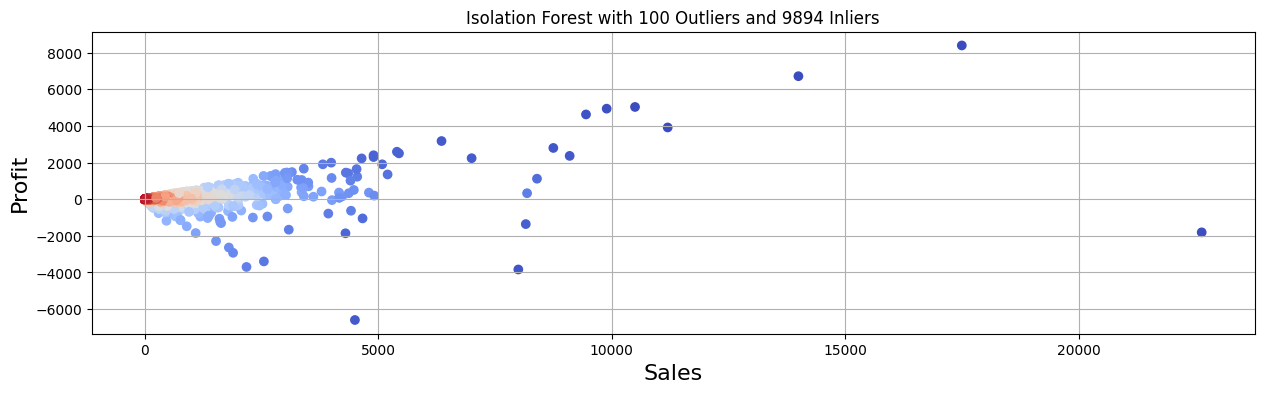

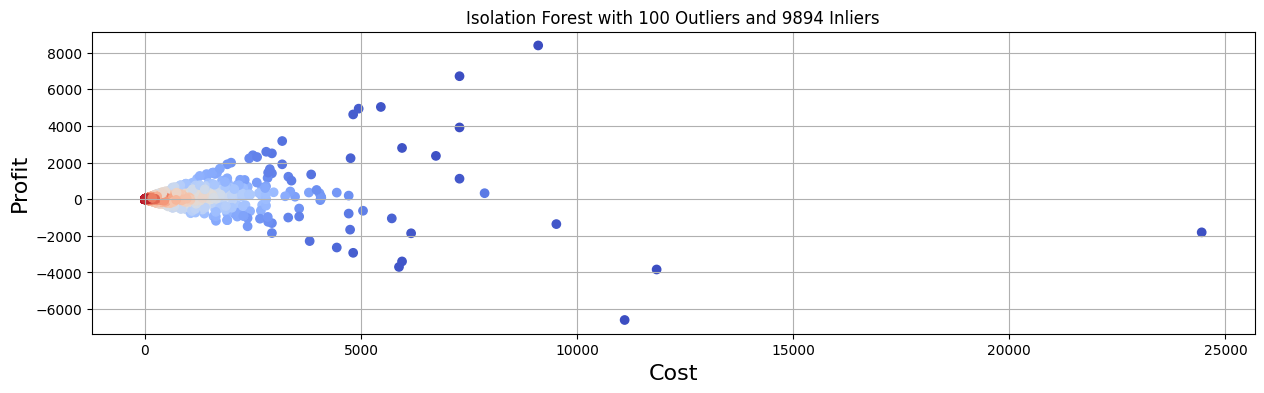

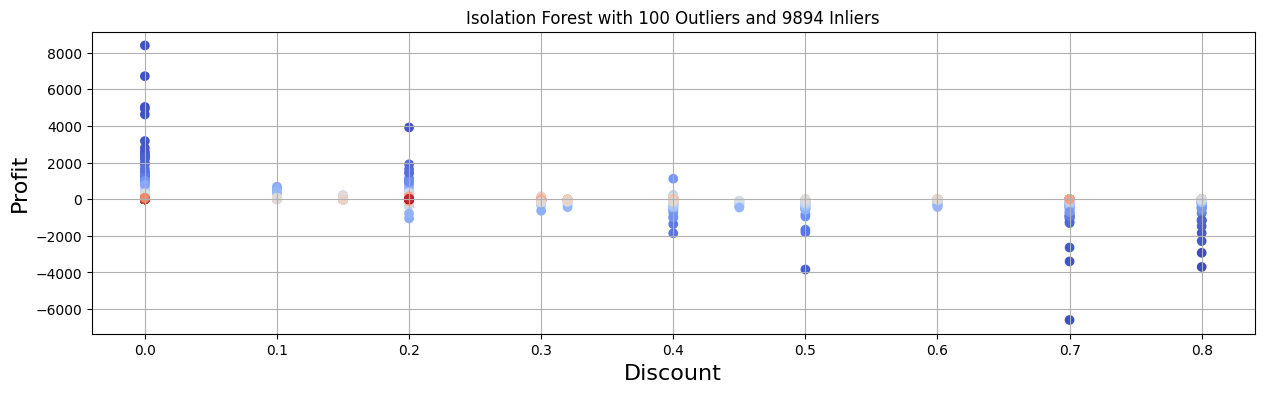

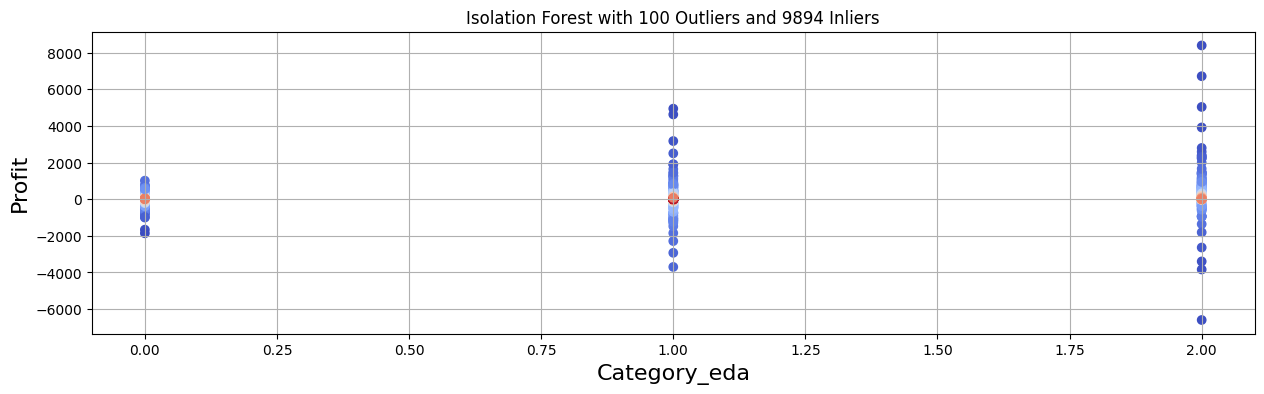

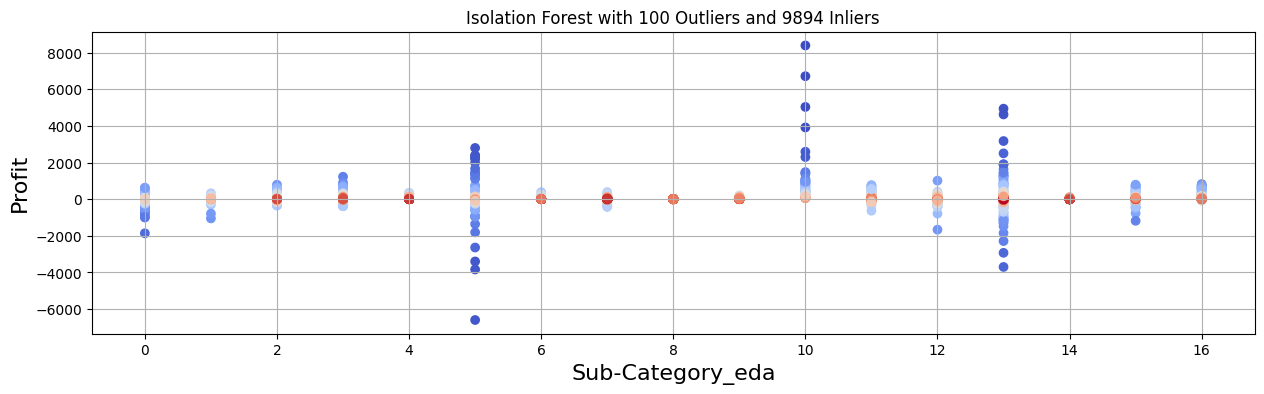

In [ ]:
value_x = {}
value_x[1]=['Sales', 'Profit']
value_x[2]=['Cost', 'Profit']
value_x[3]=['Discount', 'Profit']
value_x[4]=['Category_eda', 'Profit']
value_x[5]=['Sub-Category_eda', 'Profit']
value_x[6]=['Sales', 'Discount', 'Profit']

for i in range(1,6):
  d = df_superstore[value_x[i]]

  model  =  IsolationForest(n_estimators=50, max_samples=500, contamination=.01, max_features=2,
                         bootstrap=False, n_jobs=1, random_state=1, verbose=0, warm_start=False).fit(d)
  # Get Anomaly Scores and Predictions
  anomaly_score = model.decision_function(d)
  predictions = model.predict(d)

  n_inliers = np.count_nonzero(predictions == +1)
  n_outliers = np.count_nonzero(predictions == -1)

  print('\nFor feature combination: '+ str(value_x[i]))
  print('OUTLIERS: ',n_outliers,'INLIERS: ',n_inliers)

  ######### Visualize Anomaly scores and Anomaly Status ########
  plt.figure(figsize = (15, 4), dpi = 100)
  s = plt.scatter(df_superstore[value_x[i][0]], df_superstore[value_x[i][1]], c = anomaly_score, cmap = 'coolwarm')
  plt.xlabel(value_x[i][0], fontsize = 16)
  plt.ylabel(value_x[i][1], fontsize = 16)
  plt.title('Isolation Forest with ' + str(n_outliers) + ' Outliers and '  +  str(n_inliers) + ' Inliers' )
  plt.grid()

# Univariate Anomaly

Understanding behavior of each feature using isolation forest

In [ ]:
uni_anomaly_list = ['Sales', 'Cost', 'Profit', 'Discount']

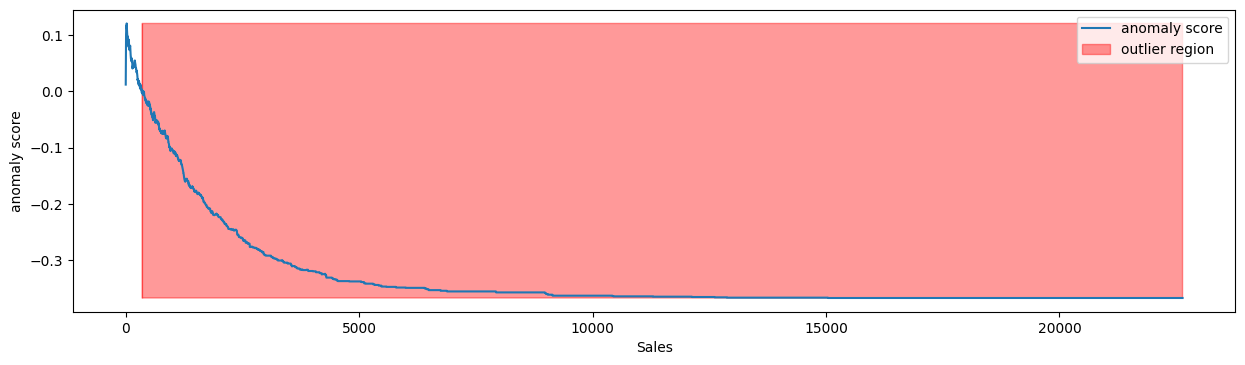

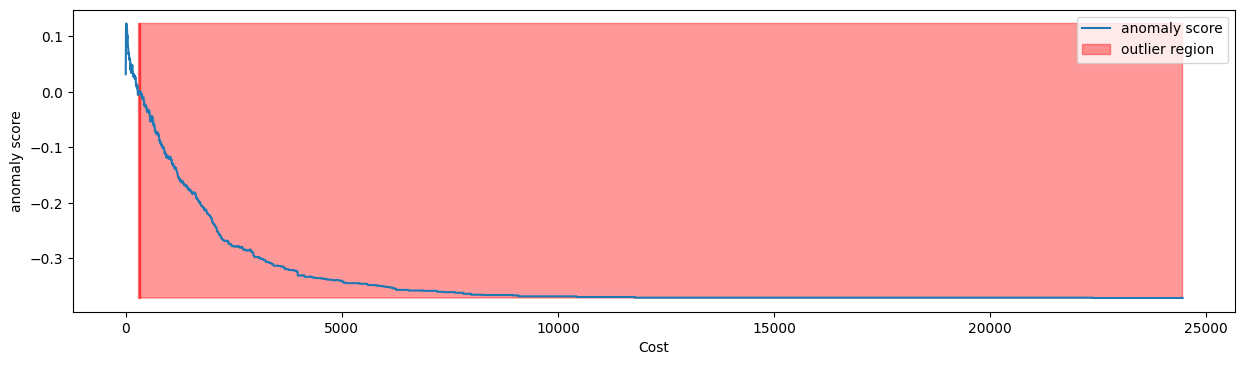

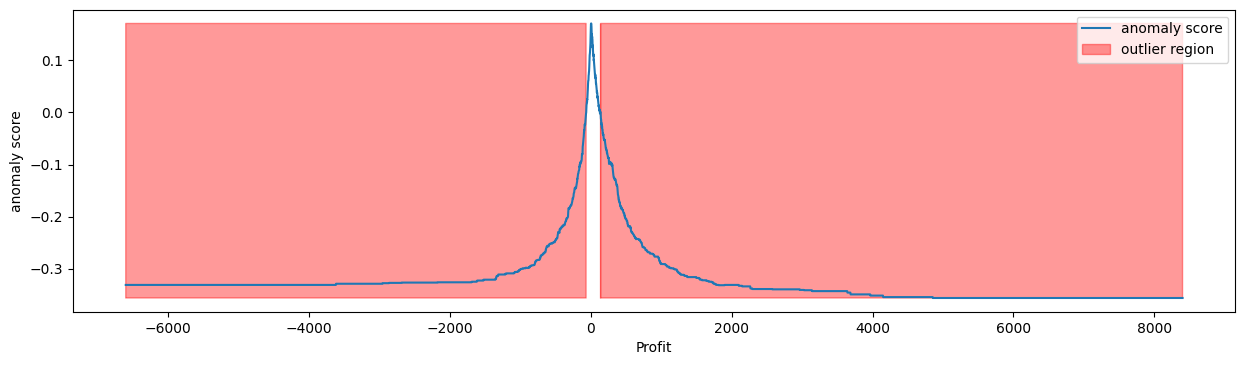

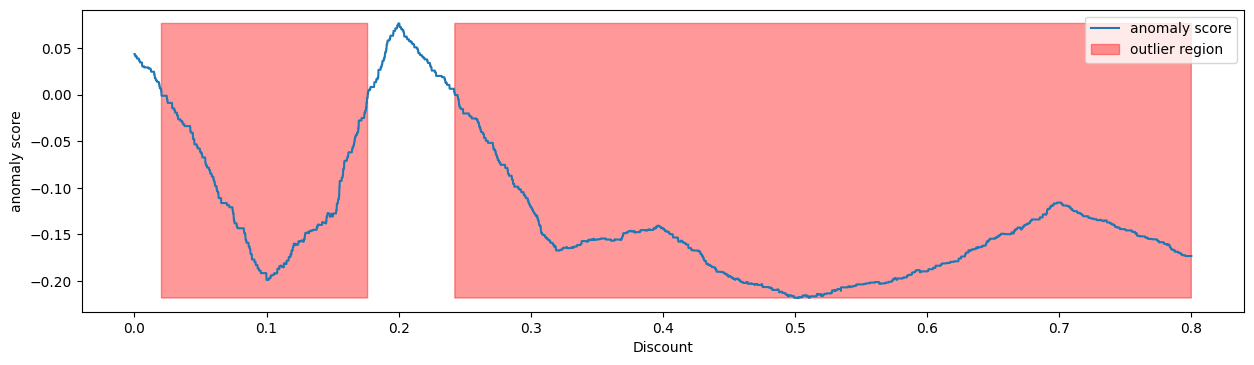

In [ ]:
for i in range(0,4):
  isolation_forest = IsolationForest(n_estimators=100)
  isolation_forest.fit(df_superstore[uni_anomaly_list[i]].values.reshape(-1, 1))
  xx = np.linspace(df_superstore[uni_anomaly_list[i]].min(), df_superstore[uni_anomaly_list[i]].max(), len(df_superstore)).reshape(-1,1)
  anomaly_score = isolation_forest.decision_function(xx)
  outlier = isolation_forest.predict(xx)
  plt.figure(figsize=(15,4), dpi = 100)
  plt.plot(xx, anomaly_score, label='anomaly score')
  plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
                 where=outlier==-1, color='r',
                 alpha=.4, label='outlier region')
  plt.legend()
  plt.ylabel('anomaly score')
  plt.xlabel(uni_anomaly_list[i])
  plt.show();

Anlaysing few samples

In [ ]:
df_superstore.loc[df_superstore['Sales'] > 1500,['Product Name','Category','Sub-Category','Sales','Cost','Profit','Discount']].head()

,Product Name,Category,Sub-Category,Sales,Cost,Profit,Discount
10,Chromcraft Rectangular Conference Tables,Furniture,Tables,1706.184,1620.8748,85.3092,0.2
27,"Riverside Palais Royal Lawyers Bookcase, Royal...",Furniture,Bookcases,3083.430,4748.4822,-1665.0522,0.5
149,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,Chairs,1951.840,1366.2880,585.5520,0.0
165,Lexmark MX611dhe Monochrome Laser Printer,Technology,Machines,8159.952,9519.9440,-1359.9920,0.4
167,SAFCO Arco Folding Chair,Furniture,Chairs,1740.060,1764.9180,-24.8580,0.3


In [ ]:
df_superstore.loc[df_superstore['Profit'] < -100,['Product Name','Category','Sub-Category','Sales','Cost','Profit','Discount']].head()

,Product Name,Category,Sub-Category,Sales,Cost,Profit,Discount
3,Bretford CR4500 Series Slim Rectangular Table,Furniture,Tables,957.5775,1340.6085,-383.0310,0.45
14,Holmes Replacement Filter for HEPA Air Cleaner...,Office Supplies,Appliances,68.8100,192.6680,-123.8580,0.80
27,"Riverside Palais Royal Lawyers Bookcase, Royal...",Furniture,Bookcases,3083.4300,4748.4822,-1665.0522,0.50
36,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",Furniture,Furnishings,190.9200,338.8830,-147.9630,0.60
72,High-Back Leather Manager's Chair,Furniture,Chairs,831.9360,946.3272,-114.3912,0.20


In [ ]:
df_superstore.loc[df_superstore['Profit'] > 200, ['Cost','Sales','Discount', 'Profit']].head()

,Cost,Sales,Discount,Profit
1,512.3580,731.94,0.0,219.5820
24,804.3651,1044.63,0.0,240.2649
54,731.2645,1029.95,0.0,298.6855
144,621.1782,839.43,0.0,218.2518
149,1366.2880,1951.84,0.0,585.5520


### Plotting Anomaly on Map for all states

In [ ]:
df_map = df_superstore.groupby(['Country', 'State']).agg({'outlier_1': 'sum'})
df_map.head()

outlier_1
Country       State                
United States Alabama             0
              Arizona             1
              Arkansas            0
              California         14
              Colorado            2

In [ ]:
df_map_merged = pd.merge(df_map, df_states, how='left', on=['State'])
df_map_merged.head(10)

,State,outlier_1,State_Code
0,Alabama,0,AL
1,Arizona,1,AZ
2,Arkansas,0,AR
3,California,14,CA
4,Colorado,2,CO
5,Connecticut,0,CT
6,Delaware,1,DE
7,District of Columbia,0,NaN
8,Florida,3,FL
9,Georgia,2,GA


In [ ]:
import plotly.graph_objects as go


fig = go.Figure(data=go.Choropleth(
    locations=df_map_merged['State_Code'], # Spatial coordinates
    z = df_map['outlier_1'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Outlier Count",
))

fig.update_layout(
    title_text = 'Outlier with k-NN',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

Exploring ItemCost and Sales

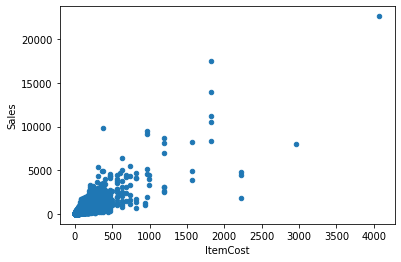

In [ ]:
df_superstore.plot.scatter('ItemCost','Sales')

# References

### Dataset Link:

https://community.tableau.com/s/question/0D54T00000CWeX8SAL/sample-superstore-sales-excelxls



### Data Analysis & Pre-processing:

https://www.kaggle.com/code/badreddineberrehal/03-dealing-with-data-your-80-work

https://www.kaggle.com/code/cihangiryiit/knn-algorithm-research-kernel



### Anomaly Detection Approach, Algorithms & Techniques:

https://towardsdatascience.com/anomaly-detection-for-dummies-15f148e559c1

https://www.analyticsvidhya.com/blog/2019/02/outlier-detection-python-pyod/

https://towardsdatascience.com/anomaly-detection-in-python-part-2-multivariate-unsupervised-methods-and-code-b311a63f298b


### Other References:

https://pyod.readthedocs.io/en/latest/example.html

https://imada.sdu.dk/u/zimek/publications/KDD2010/kdd10-outlier-tutorial.pdf

https://github.com/yzhao062/anomaly-detection-resources



### Some useful links:

http://odds.cs.stonybrook.edu/#table1

https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/OPQMVF

https://github.com/datamllab/tods/tree/benchmark

